# MFCOVER Product

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the MFCOVER product created by BOKU. This product contains the fraction of vegetation cover (FCOVER) layer obtained from Sentinel-2A and 2B data, temporally aggregated over monthly periods. If two or more valid pixels are found in the monthly compositing period, only the most recent pixel is taken. The product is resampled to the Equi7 Grid, covers an area of 100 km x 100 km with a pixel sampling of 10 m.

The product name in the ACube is `MFCOVER_Sentinel_2`. It is composed of single measurement `band_1`.

Relevant links:
* https://acube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/3.4.2.3.%20Products/
* https://acube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has two measurements and a spatial resolution of 10 m. We also list the metadata fields that are available.

In [1]:
import datacube
import xarray
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_mfcover', env='acube')
product = 'MFCOVER_Sentinel_2'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,instrument,format,platform,product_type,crs,resolution,spatial_dimensions
id,,,,,,,,,
20,MFCOVER_Sentinel_2,Monthly composite FCOVER,MSI,GeoTIFF,Sentinel-2,BOKU_MFCOVER_S2,"PROJCS[""unnamed"",GEOGCS[""WGS 84"",DATUM[""WGS_19...","(-10, 10)","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

,,name,dtype,units,nodata,aliases
product,measurement,,,,,
MFCOVER_Sentinel_2,band_1,band_1,int16,fraction,32767,"[band_01, Band1, Band_1]"


In [4]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2019-06-06', '2019-06-06')
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print(100*'*')
    print('METADATA FIELDS: ', sorted(list(dataset.metadata_doc.keys())))
    print(100*'*')
    print('METADATA')
    pprint(dataset.metadata_doc)
    print(100*'*')

****************************************************************************************************
METADATA FIELDS:  ['equi7_system', 'equi7_tile', 'extent', 'format', 'grid_spatial', 'id', 'image', 'instrument', 'lineage', 'name', 'platform', 'product_type']
****************************************************************************************************
METADATA
{'equi7_system': 'EU010M',
 'equi7_tile': 'E052N016T1',
 'extent': {'center_dt': '2019-06-01T00:00:00',
            'coord': {'ll': {'lat': 47.97836637131796,
                             'lon': 15.455732336236064},
                      'lr': {'lat': 48.0747977797218, 'lon': 16.78723851350588},
                      'ul': {'lat': 48.87019287824474,
                             'lon': 15.300385421628878},
                      'ur': {'lat': 48.96874953569572,
                             'lon': 16.65563642003795}},
            'from_dt': '2019-06-01T00:00:00',
            'to_dt': '2019-06-30T00:00:00'},
 'format': {'nam

## Querying and displaying the data

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:      (time: 1, x: 1526, y: 2250)
Coordinates:
  * time         (time) datetime64[ns] 2019-06-15T12:00:00
  * y            (y) float64 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x            (x) float64 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
    spatial_ref  int32 32633
Data variables:
    band_1       (time, y, x) int16 796 776 757 778 ... 32767 32767 32767 272
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

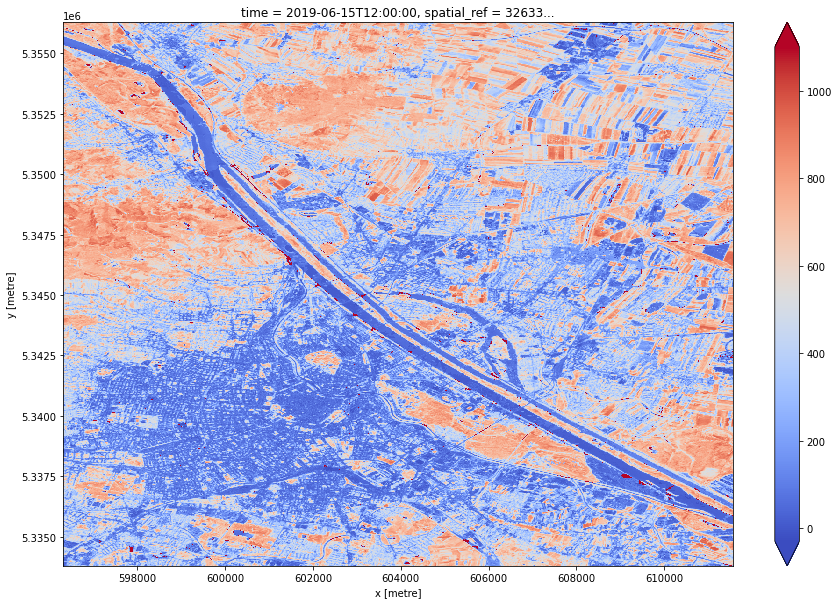

In [7]:
data.to_array().plot(size=10, vmin=-30, vmax=1100, cmap='coolwarm')